<a href="https://colab.research.google.com/github/oakaigh/cogs118b-wi22-final-project/blob/main/cogs118b_wi22_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 118B Final Project: Classification of Wine Quality through clustering

## Group Members

* Dhanush Nanjunda Reddy
* Dhruv Sood
* Sohan Ghosh
* Gilberto Robles
* Arjun Gujral
* Jared Chen


## Import Relevant Libraries

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

def _set_constrained_layout(plt):
    plt.rcParams['figure.constrained_layout.use'] = True
_set_constrained_layout(plt)

In [ ]:
import numpy as np
import pandas as pd

import sklearn as skl
import sklearn.preprocessing


In [ ]:
# TODO rm
from sklearn.preprocessing import normalize
from numpy import linalg as la

#import time

#from sklearn.preprocessing import normalize
#from numpy.matlib import repmat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def is_none(a):
    return isinstance(a, type(None))

def subplots(
    n, 
    ncols = 1, visible = False, 
    *args, **kwargs
):
    fig, axs = plt.subplots(
        *args, **kwargs,
        ncols = ncols, 
        nrows = int(np.ceil(n / ncols))
    )
    axs = axs.flatten()
    for ax in axs:
        ax.set_visible(visible)
    return fig, axs

def figure_height_adjust(fig, ratio = 1 / 4):
    fig_w, fig_h = fig.get_size_inches()
    fig_w, fig_h = fig_w, fig_h * len(fig.get_axes()) * ratio
    fig.set_size_inches(fig_w, fig_h)
    return fig

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_resp(
    ax, X, 
    rnk, kmu_v, 
    transp = 0.5, s = 200
):
    N, D = X.shape
    K, _ = kmu_v.shape

    init_colormat = np.array(
        [[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1],
         [0, 0, 0],
         [1, 1, 0],
         [1, 0, 1],
         [0, 1, 1]]
    )

    k_colormat = init_colormat[0:K,:]

    color_v = np.dot(rnk, k_colormat)
    mu_color_v = np.dot(np.eye(K), k_colormat)
    
    ax.scatter(
        X[:,0], X[:,1], 
        c = color_v, alpha = transp, edgecolors = 'none'
    )
    ax.scatter(
        kmu_v[:,0], kmu_v[:,1], 
        c = mu_color_v, s = s, marker = 'd'
    )
    
    return ax, (color_v, mu_color_v)

## Load dataset

In [ ]:
data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 
    delimiter = ';'
)

## Preprocessing

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Check for null values.

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Check for data types.

In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Check for how many unique classifying labels there are.


In [ ]:
classes = np.sort(data['quality'].unique())

💅

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Normalizing Data

In [ ]:
y = np.asarray(data['quality'])
X = np.asarray(
    skl.preprocessing.MinMaxScaler()
    .fit_transform(
        data.drop('quality', axis = 1)
    )
)
K = len(data['quality'].unique())
_, N = X.shape

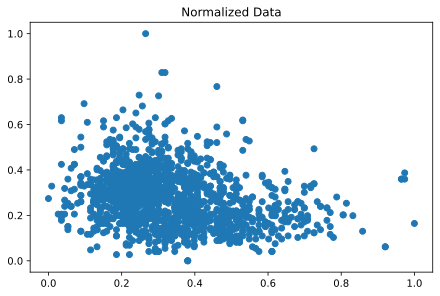

In [ ]:
fig, ax = plt.subplots()
ax.set(title = "Normalized Data")
ax.scatter(X[:,0], X[:,1])
fig.show()

## PCA

In [ ]:
# using PCA to reduce 11 dimensions down to 2

def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [ ]:
# normc(M) normalizes the columns of M to a length of 1.

def normc(Mat):
    return skl.preprocessing.normalize(Mat, norm='l2', axis=0)

In [ ]:
## get the mean of the data
mean = np.mean(X, axis=1)[:,None]
mean.shape

(1599, 1)

In [ ]:
## standardization
A = X-mean
A.shape

(1599, 11)

In [ ]:
#  compute the eigenvectors and eigenvalues of A.⊤ * A
lamda, eig = la.eig(A.T @ A)

eig.shape

(11, 11)

In [ ]:
# sort eigvectors and eigvals
V, vals = eigsort(eig, lamda)

In [ ]:
## If V is the eigenvector matrix of A.T*A with eigenvalues lambda, 
## which is more easily computed than the eigenvectors of A*A.T.

## To get the eigenvectors of A@A.T, we can follow:       Note: Parentheses denote multiplication

##  A.T*A(V) = lambda(V)
## (A)A.T*A(V) = (A)lambda(V)
## (AA.T)(A*V) = lambda(A*V)

#### Thus, U = A*V, is an eigenvector matrix of A@A.T, with the same eigenvalues lambda
U = A @ V

U.shape

(1599, 11)

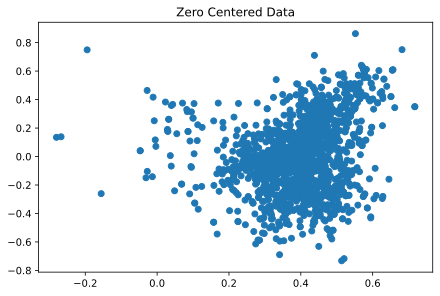

In [ ]:
##  The centered data
fig, ax = plt.subplots()
ax.set(title = 'Zero Centered Data')
ax.scatter(U[:,0], U[:,1])
fig.show()

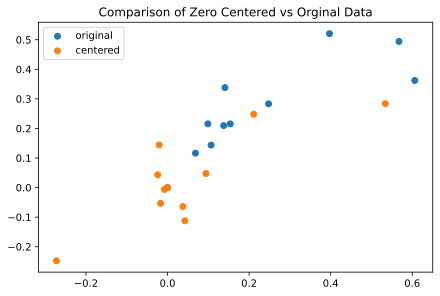

In [ ]:
fig, ax = plt.subplots()
ax.set(title = 'Comparison of Zero Centered vs Orginal Data')
ax.scatter(X[0], X[1], label = 'original')
ax.scatter(U[0], U[1], label = 'centered')
ax.legend()
fig.show()

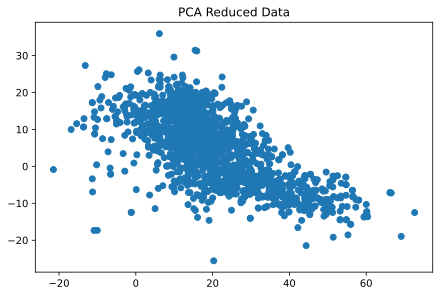

In [ ]:
# calculate principal components
c = U.T @ (X - mean)

# using 11 principal components 
z = U[:,:11] @ c[:11, :] + mean

fig, ax = plt.subplots()
ax.set(title = 'PCA Reduced Data')
ax.scatter(z[:,0], z[:,1])
fig.show()

## K-Means

In [ ]:
import numpy as np

class KMeans:
    def __init__(self, K):
        self.K = K

    def run(self, X, debug_fn = None):
        def _debug_fn(*args, **kwargs):
            return debug_fn(*args, **kwargs)   \
                if debug_fn else None

        thres = 1e-6
        max_iter_cnt = 1000

        def calc_sqdists(X, kmu_v):
            return (
                (-2 * X @ kmu_v.T + np.sum(kmu_v**2, axis = 1).T).T 
                    + np.sum(X**2, axis = 1)
            ).T

        def determine_rnk(mat):
            m = np.argmin(mat, axis = 1)
            return np.eye(mat.shape[1])[m]

        def recalc_mus(X, rnk):
            return (np.divide(X.T.dot(rnk), np.sum(rnk, axis = 0))).T

        K = self.K

        N, D = np.shape(X)

        kmu_v = np.zeros((K, D))

        rand_inds = np.random.permutation(N)
        kmu_v = X[rand_inds[0:K],:]

        for _ in range(max_iter_cnt):
            mat = calc_sqdists(X, kmu_v)
            rnk = determine_rnk(mat)

            kmu_v_old = kmu_v
            kmu_v = recalc_mus(X, rnk)

            _debug_fn(X, rnk, (kmu_v))

            if np.sum(
                np.abs(
                    kmu_v_old.flatten() 
                        - kmu_v.flatten() 
                )
            ) < thres:
                break

        _debug_fn(X, rnk, (kmu_v))

        return rnk, kmu_v

----

In [ ]:
def plotCurrent(X, Rnk, Kmus):
    N, D = X.shape
    K = Kmus.shape[0]

    InitColorMat = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [0, 0, 1],
                             [0, 0, 0],
                             [1, 1, 0],
                             [1, 0, 1],
                             [0, 1, 1]])
    # TODO
    KColorMat = InitColorMat[0:K,:]

    # print('--', Rnk.shape, KColorMat.shape)

    colorVec = np.dot(Rnk, KColorMat)
    # idx keeps track of the labels of each point
    u, idx = np.unique(colorVec, axis=0, return_inverse=True)
    muColorVec = np.dot(np.eye(K), KColorMat)

    # fig, ax = plt.subplots()
    
    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors=colorVec, alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], s=50, c=muColorVec, marker='D')
    plt.show()
    return idx

In [ ]:
def calcSqDistances(X, Kmus):
    return ((-2 * X.dot(Kmus.T) + np.sum(np.multiply(Kmus, Kmus), axis=1).T).T + np.sum(np.multiply(X, X), axis=1)).T

def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis=1)
    return np.eye(sqDmat.shape[1])[m]

def recalcMus(X, Rnk):
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk, axis=0))).T

In [ ]:
def runKMeans(K, X):
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]]
    maxiters = 1000
    
    for iter in range(maxiters):
        #calculate sum of squares distances
        sqDmat = calcSqDistances(X, Kmus)

        #calculate responsibility matrix
        Rnk = determineRnk(sqDmat)

        #save the old centroid to compare
        Kmus_old = Kmus

        #recalculate mu values based on cluster assignments
        Kmus = recalcMus(X, Rnk)

        #check to see if the cluster centers have converged.  If so, break.
        if (sum(abs(Kmus_old.flatten() - Kmus.flatten()))) < 1e-6:
            break
    # return Kmus
    kmeans = plotCurrent(X, Rnk, Kmus)
    return kmeans

## K Means Clustering on PCA Reduced Data

In [ ]:
z_new = np.stack((z[:, 0], z[:, 1]), axis = 1)

resp_z, kmu_z = KMeans(K).run(z)
resp_z_new, kmu_z_new = KMeans(K).run(z_new)

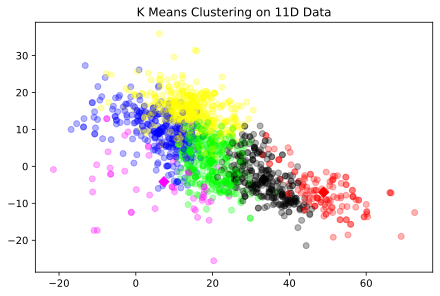

array([5, 1, 1, ..., 1, 1, 2])

In [ ]:
plt.title('K Means Clustering on 11D Data')
runKMeans(K, z)

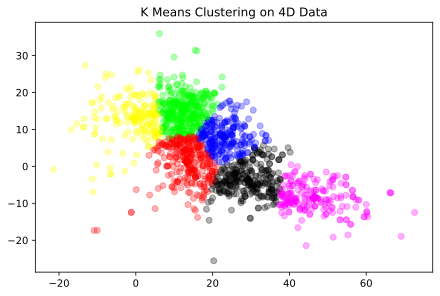

array([2, 2, 2, ..., 5, 5, 3])

In [ ]:
plt.title("K Means Clustering on 4D Data")
runKMeans(K, z_new)

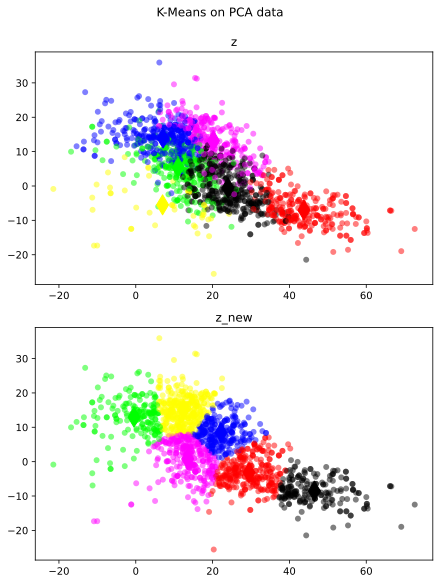

In [ ]:
fig, axs = subplots(2, ncols = 1, visible = True)

fig.suptitle('K-Means on PCA data')

axs[0].set(title = 'z')
_, (cv_z, _) = plot_resp(axs[0], 
    X = z, rnk = resp_z, kmu_v = kmu_z
)
_, kmeans_z = np.unique(cv_z, axis = 0, return_inverse = True)

axs[1].set(title = 'z_new')
_, (cv_z_new, _) = plot_resp(axs[1], 
    X = z, rnk = resp_z_new, kmu_v = kmu_z_new
)
_, kmeans_z_new = np.unique(cv_z_new, axis = 0, return_inverse = True)

figure_height_adjust(fig, ratio = 1)
fig.show()

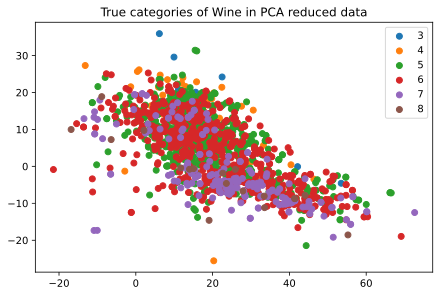

In [ ]:
df_pca = pd.DataFrame(data = {
    'col1': z[:, 0], 
    'col2': z[:, 1], 
    'y': y
})

fig, ax = plt.subplots()
for name, group in df_pca.groupby('y'):
    ax.scatter(group['col1'], group['col2'], label = name)
ax.set(title = "True categories of Wine in PCA reduced data")
ax.legend()
fig.show()

----

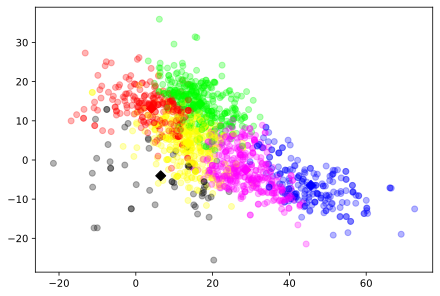

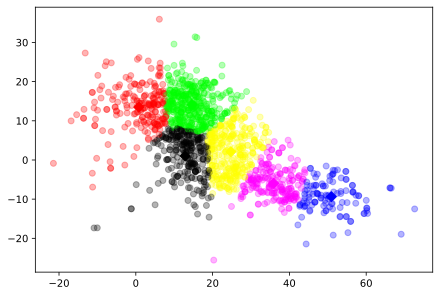

'\nTODO: bring plotting function outside of runKMeans\nrunKMeans should just return some value\n'

In [ ]:
# kmeans on PCA data
col1 = z[:, 0]
col2 = z[:, 1]
z_new = np.stack((col1, col2), axis=1)

# running on z (1599,11)
kmeansZ = runKMeans(K, z)
kmeansZ_new = runKMeans(K, z_new)

'''
TODO: bring plotting function outside of runKMeans
runKMeans should just return some value
'''

In [ ]:
z_new.shape

(1599, 2)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No handles with labels found to put in legend.


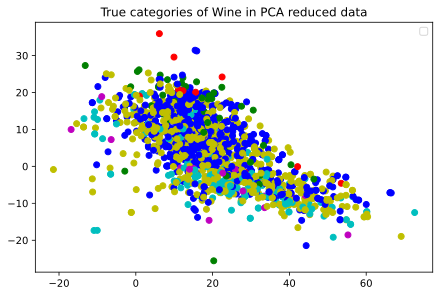

In [ ]:
# showing the actual values of wines
#plt.scatter(col1, col2)

'''
red = 3
green = 4
blue = 5
yellow = 6
cyan = 7
magenta = 8
'''

classes = [3, 4, 5, 6, 7, 8]
colors = np.array(['r', 'g', 'b', 'y', 'c', 'm'])
scatter = plt.scatter(col1, col2, c=colors[y-3])
plt.title("True categories of Wine in PCA reduced data")

plt.legend(handles=scatter.legend_elements()[0], labels=classes)

## Clustering Evaluation

How well do the labels of the clusters correspond with the labels of quality

In [ ]:
import sklearn.metrics.cluster as skl_cluster

print(skl_cluster.adjusted_rand_score(y, kmeans_z))
print(skl_cluster.adjusted_rand_score(y, kmeans_z_new))

0.016927652253863494
0.020926064760658898


## ~~REMOVE Gaussian Mixture Model Clustering~~

In [ ]:
import numpy as np

class GMM:
    def __init__(self, K, mu):
        self.K = K
        self.mu = mu
        self.prior = np.array([1 / self.K] * self.K)

    def run(self, X, debug_fn = None):
        def _debug_fn(*args, **kwargs):
            return debug_fn(*args, **kwargs)   \
                if debug_fn else None

        def gaussian(X, mu, cov):
            _, d = np.shape(X)
            mu = mu[None,:]

            dr = 1 / (np.sqrt((2 * np.pi)**d * np.linalg.det(cov)))
            nr = np.exp(
                -np.diag(
                    (X - mu) 
                        @ (np.linalg.inv(cov))
                        @ ((X - mu).T)
                    / 2
                )
            )
            return nr * dr

        def determine_rnk(X, K, params):
            N = len(X)
            rnk = np.zeros((N, K), dtype = np.float32)

            prior, mu, cov = params

            for cluster in range(K):
                rnk[:,cluster] = gaussian(X, 
                    mu[cluster], 
                    cov[cluster]
                ) * prior[cluster]
            
            rnk = np.divide(rnk, np.sum(rnk, axis = 1, keepdims = True))

            return rnk

        def recalc_params(X, K, rnk):
            N, D = np.shape(X)

            prior = np.sum(rnk, axis = 0) / N
            mu = np.divide(rnk.T @ X, np.sum(rnk, axis = 0, keepdims = True).T)

            cov_temp = np.zeros((K, D))
            for k in range(K):
                cov_temp[k] = np.divide(
                    rnk[:,k].T 
                        @ ((X - mu[k]) * (X - mu[k])),
                    np.sum(rnk[:,k])
                )

            cov = np.zeros((K, D, D))
            for i in range(K):
                cov[i] = np.diag(cov_temp[i])

            return prior, mu, cov

        _, D = np.shape(X)        
        cov = np.zeros((K, D, D))
        # TODO cov
        for i in range(K):
            cov[i] = np.diag(np.arange(1, D + 1))

        prior, mu = self.prior, self.mu

        max_iter_cnt = 1000
        thres = 1e-3

        iter_cnt = 0
        for iter_cnt in range(1, max_iter_cnt + 1):
            rnk = determine_rnk(X, K, (prior, mu, cov))

            _debug_fn(X, rnk, (prior, mu, cov))

            prior_new, mu_new, cov_new = recalc_params(X, K, rnk)

            if np.linalg.norm(mu_new - mu) < thres:
                break

            prior, mu, cov = prior_new, mu_new, cov_new

        _debug_fn(X, rnk, (prior, mu, cov))

        return iter_cnt, (prior_new, mu_new, cov_new)

    def plot(self, X, sample_rate = 1, debug_fn = None, subplot_opts = {}):
        plot_params = []
        def _debug_fn(X, rnk, params):
            nonlocal plot_params
            _, mu, _ = params
            plot_params.append((X, rnk, mu))
            return debug_fn(X, rnk, params) if debug_fn else None
        res = self.run(X, debug_fn = _debug_fn)

        plot_params = plot_params[::int(sample_rate * len(plot_params))]
        fig, axes = subplots(len(plot_params), **subplot_opts)
        for ax, ps in zip(axes.flatten(), plot_params):
            ax.set_visible(True)
            plot_resp(ax, *ps)

        return res, fig

In [ ]:
'''
_, mu = KMeans(X, K).run()


_, (prior_new, mu_new, cov_new) = GMM(K, mu).run(X)



from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduced_mu = pca.fit_transform(mu_new)
col1 = z[:, 0]
col2 = z[:, 1]



z_new = np.stack((col1, col2), axis=1)

# print(z_new)
#print(mu_new.shape)
#print(z_new.shape, reduced_mu.shape, resp.shape)

fig, ax = plt.subplots()
plot_resp(ax, z_new, rnk = resp, kmu_v = mu)

#fig.suptitle(fr'$K = {K}$; iter ${iter_cnt}$')
#figure_height_adjust(fig)

fig.show()
'''

"\n_, mu = KMeans(X, K).run()\n\n\n_, (prior_new, mu_new, cov_new) = GMM(K, mu).run(X)\n\n\n\nfrom sklearn.decomposition import PCA\npca = PCA(n_components = 2)\nreduced_mu = pca.fit_transform(mu_new)\ncol1 = z[:, 0]\ncol2 = z[:, 1]\n\n\n\nz_new = np.stack((col1, col2), axis=1)\n\n# print(z_new)\n#print(mu_new.shape)\n#print(z_new.shape, reduced_mu.shape, resp.shape)\n\nfig, ax = plt.subplots()\nplot_resp(ax, z_new, rnk = resp, kmu_v = mu)\n\n#fig.suptitle(fr'$K = {K}$; iter ${iter_cnt}$')\n#figure_height_adjust(fig)\n\nfig.show()\n"

---

In [ ]:
# calculates the gaussian pdf for a given value
def gaussian(X, mu, cov):
    D = np.shape(X)[1]
    mu = mu[None, :]
    dr = 1/(np.sqrt((2*np.pi)**(D) * np.linalg.det(cov)))
    nr = (np.exp(-np.diag((X-mu)@(np.linalg.inv(cov))@((X-mu).T)/2)))
    return nr * dr

In [ ]:
# responsibility
def calcRespons(X, pi, mu, cov):
    nr = np.zeros((X.shape[0], K))
    for i in range(K):
        nr[:, i] = pi[i] * gaussian(X, mu[i], np.diag(cov[i]))
    dr = np.sum(nr, axis = 1, keepdims = True)
    return np.divide(nr, dr)

In [ ]:
# main Gaussian Mixture Model question
def runGMM(X, K, pi_old, mu_old, variance_old):
    N, D = X.shape
    gamma = np.zeros((N, K))
    for iter in range(1000):
        gamma = calcRespons(X, pi_old, mu_old, variance_old)
        
        pi = np.sum(gamma, axis = 0) / N
        
        mu_k = np.zeros((K, D))
        
        for i in range(K):
            mu_k[i] = np.divide((gamma.T @ X)[i], np.sum(gamma[:, i]))
        
        variance = np.zeros((K, D))
        for i in range(K):
            variance[i] = np.divide((gamma[:, i].T @ ((X-mu_k[i])**2)), np.sum(gamma[:, i]))
            variance[variance < 0.01] = 0.01
            if np.sum(np.abs(mu_old.reshape((-1, 1)) - mu_k.reshape((-1, 1)))) < 1e-2:
                break
        pi_old, mu_old, variance_old = pi, mu_k, variance
    
    # plotCurrent(X, gamma, mu_old)
    return pi_old, mu_old, variance_old, gamma
    kmeans = plotCurrent(X, Rnk, Kmus) 

In [ ]:
# init

K = 6
pi_old = np.asarray([1/2] * K)
# mu_old = runKMeans(K, X)
mu_old = np.zeros((6, 11))
np.asarray([1/2] * N)

# variance = np.diag(np.asarray([1/2] * 11))
variance = np.zeros((K, N))
for i in range(len(variance)):
  variance[i] = np.asarray([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2])

pi_new, mu_new, variance_new, resp = runGMM(X, K, pi_old, mu_old, variance)

# this gives us the values in 11 dimensions
# we need to reduce this down to 2 dimensions using PCA

(1599, 2)
(1599, 6)
(6, 2)


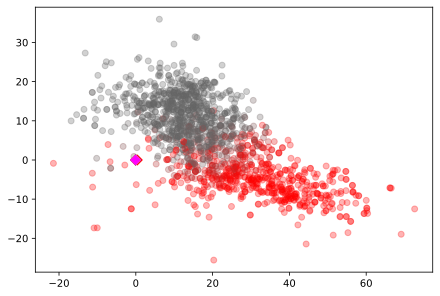

In [ ]:
'''
z is X reduced
need to reduce mu_new from (6, 11) to (6, 2)
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_mu = pca.fit_transform(mu_new)
# print(z_new)
col1 = z[:, 0]
col2 = z[:, 1]

# print(mu_new.shape)

z_new = np.stack((col1, col2), axis=1)
print(z_new.shape)
print(resp.shape)
print(reduced_mu.shape)
plotCurrent(z, resp, reduced_mu);

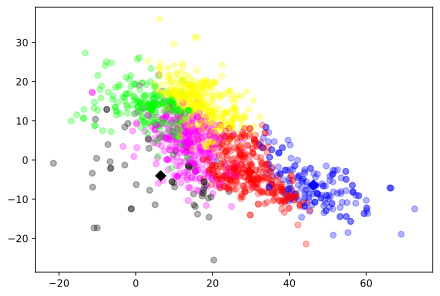

array([5, 4, 2, ..., 2, 2, 4])

In [ ]:
runKMeans(K, z)

## ~~REMOVE Another GMM method *attempt*~~

# FIXME `plot_resp` color mat


In [ ]:
# TODO
raise NotImplementedError('no GMM')

NotImplementedError: ignored

In [ ]:
def plotCurrent(X, Rnk, Kmus):
    N, D = X.shape
    K = Kmus.shape[0]

    InitColorMat = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [0, 0, 1],
                             [0, 0, 0],
                             [1, 1, 0],
                             [1, 0, 1],
                             [0, 1, 1]])

    KColorMat = InitColorMat[0:K,:]

    colorVec = np.dot(Rnk, KColorMat)
    muColorVec = np.dot(np.eye(K), KColorMat)
    plt.scatter(X[:,0], X[:,1], c=colorVec, alpha=0.3)
    #plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors=colorVec, a=0.3)

    plt.scatter(Kmus[:,0], Kmus[:,1], s=200, c=muColorVec, marker='d')
    plt.axis('equal')
    plt.show()
    
    
    #plt.scatter(Kmus[:,0], Kmus[:,1], s=50, c=muColorVec, marker='D')
    #plt.show()
 


In [ ]:
def calcSqDistances(X, Kmus):
    
    n=X.shape[0]
    k=Kmus.shape[0]
    
    dist = np.zeros((n,k))
    
    for a in range(n):
        
        for b in range(k):
            element = np.linalg.norm(X[a]-Kmus[b])
            dist[a,b]= element
    
    
    return dist

In [ ]:
def determineRnk(sqDmat):
    rank=np.zeros(sqDmat.shape)
    for i in range (len(sqDmat)):
        rank[i,np.argmin(sqDmat[i])]=1
    return rank

In [ ]:
def recalcMus(X, Rnk):
    
    #matrix multiply the transpose of X with Rnk matrix
    XxRnk= X.T @ Rnk
    #transpose matrix
    transp=np.divide(XxRnk,np.sum(Rnk,axis=0)).T
    return transp

In [ ]:
def runKMeans(K,X):

    #determine and store data set information
    N, D = X.shape

    #allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    #initialize cluster centers by randomly picking points from the data
    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]

    #specify the maximum number of iterations to allow
    maxiters = 1000

    for iter in range(maxiters):
        #assign each data vector to closest mu vector as per Bishop (9.2)
        #do this by first calculating a squared distance matrix where the n,k entry
        #contains the squared distance from the nth data vector to the kth mu vector

        #sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus)

        #given the matrix of squared distances, determine the closest cluster
        #center for each data vector

        #R is the "responsibility" matrix
        #R will be an N-by-K matrix of binary values whose n,k entry is set as
        #per Bishop (9.2)
        #Specifically, the n,k entry is 1 if point n is closest to cluster k,
        #and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus
        # TODO dont need em
        #plotCurrent(X, Rnk, Kmus)
        #time.sleep(1)

        #recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)





        #check to see if the cluster centers have converged.  If so, break.
        if np.sum(np.abs(KmusOld.reshape((-1, 1)) - Kmus.reshape((-1, 1)))) < 1e-6:
            print(iter)
            break

    plotCurrent(X, Rnk, Kmus)
    
    return Kmus

In [ ]:
def runGMM(K,X, pi, mu, var):

    #determine and store data set information
    N, D = np.shape(X)

    #allocate space for the gamma vectors
    gamma = np.zeros((K, D))

    #specify the maximum number of iterations to allow
    maxiters = 1000
    begGamma = calcRespons(X,pi,mu,var)
    for iter in range(maxiters):
        #calculating gamma first
        gamma = calcRespons(X,pi,mu,var)
        
        #getting all the other parameters we need
        pi, mu, var = recalcParams(X,gamma)
        
        #input to determine rank
        matrix=calcRespons(X,pi,mu,var)
        #find rank
        rank=determineRnk(matrix)
        
        #plotting
        # TODO 
        #plotCurrent(X,rank,mu)

       
        #check to see if the cluster centers have converged.  If so, break.
        if np.sum(np.abs(mu.reshape((-1, 1)) - mu.reshape((-1, 1)))) < 1e-2:
            print(iter)
            #break
    
    
    #find rank
    matrix=calcRespons(X,pi,mu,var)
    rank=determineRnk(matrix)
    finalGamma = calcRespons(X,pi,mu,var)
    plotCurrent(X, rank, mu)
    
    
    return begGamma, finalGamma

In [ ]:
def gauss(X,mu,cov):
    
    #2nd index of dimension
    k = np.shape(X)[1]
    
    #setting the mean
    mu = mu[None,:]
   
    
    
    #the gaussian pdf
    pdf1 = (1/(np.sqrt((2*np.pi)**(k)*np.linalg.det(cov)))) 
    A = (X-mu).T @ (np.linalg.inv(cov))
    print("A shape: "+str(A))
    print("A: "+str(A.shape))
    B = A @ ((X-mu))/2
    print("B shape: "+str(B.shape))
    #print("")
    #B=A@((X-mu).T)/2
   # print(B)

    pdf2=(np.exp(-np.diag(B)))
    #(X-mu) @ (np.linalg.inv(cov)) @ ((X-mu))/2


    pdf= pdf1*pdf2
    
    return pdf

In [ ]:
def calcRespons(X,pi,mean,cov):
    
    #0th index of dimension array
    n=X.shape[0]
    
    #initialziing numerator
    num=np.zeros((n,2))
    
    for i in range(2):
        #numerator of the new pi
        num[:,i] = pi[i]* gauss(X,mean[i],np.diag(cov[i]))
    
    #denominator of the new pi
    den = np.sum(num, axis=1, keepdims= True)
    
    #find the new pi
    newP = np.divide(num,den)
    
    return newP

In [ ]:
def recalcParams(X,gamma):
    
    #finding pi
    pi=np.sum(gamma, axis=0)/(X.shape[0])
    
    #initializing the mean
    muNew=np.zeros((gamma.shape[1],X.shape[1]))
    
    #for loop to calculate the mean
    for i in range(gamma.shape[1]):
        #find the mean for each index
        muNew[i]=np.divide((gamma.T@X)[i],np.sum(gamma[:,i]))
     
    #print(np.shape(muNew))
    #initialzing the variance
    varNew=np.zeros((gamma.shape[1],X.shape[1]))
    
    #for loop to calculate the variance array
    for i in range(gamma.shape[1]):
        #find the variance for each index
        varNew[i]=np.divide((gamma[:,i].T@((X-muNew[i])**2)),np.sum(gamma[:,i]))
        
        #reassaign variance if less than 0.01
        varNew[varNew<0.01]=0.01
        
    return pi,muNew,varNew

In [ ]:
#initalizing all variables
col1 = z[:, 0]
col2 = z[:, 1]
z_new = np.stack((col1, col2), axis=1)
z_new = np.append(z_new,[[0,0]],axis=0)

#initializing pi
piOld = np.asarray([1/2] * 6)

#initializing mean
meanOld = runKMeans(K, z_new)

#initialize variance
var = np.zeros((6,1600))
#setting variance matrix
for i in range(len(var)):
    var[i] = np.tile([2, 3, 2, 3],400)

In [ ]:
#runGMM(6, z_new, piOld, meanOld, var)

In [ ]:
z_new

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def is_none(a):
    return isinstance(a, type(None))

def subplots(n, ncols = 1, *args, **kwargs):
    fig, axes = plt.subplots(
        *args, **kwargs,
        ncols = ncols, 
        nrows = int(np.ceil(n / ncols))
    )
    for ax in axes.flatten():
        ax.set_visible(False)
    return fig, axes

def figure_height_adjust(fig, ratio = 1 / 4):
    fig_w, fig_h = fig.get_size_inches()
    fig_w, fig_h = fig_w, fig_h * len(fig.get_axes()) * ratio
    fig.set_size_inches(fig_w, fig_h)
    return fig

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_resp(ax, X, rnk, kmu_v):
    N, D = X.shape
    K, _ = kmu_v.shape

    init_colormat = np.array(
        [[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1],
         [0, 0, 0],
         [1, 1, 0],
         [1, 0, 1],
         [0, 1, 1]]
    )

    k_colormat = init_colormat[0:K,:]

    color_v = np.dot(rnk, k_colormat)
    mu_color_v = np.dot(np.eye(K), k_colormat)

    #print('color_v', color_v.shape)

    '''
    ax.scatter(
        X[:,0], X[:,1]
    )
    ax.scatter(
        kmu_v[:,0], kmu_v[:,1], 
        s = 200, marker = 'd'
    )
    '''

    # TODO color mat!!!!
    
    ax.scatter(
        X[:,0], X[:,1], 
        c = color_v
    )
    ax.scatter(
        kmu_v[:,0], kmu_v[:,1], 
        s = 200, c = mu_color_v, marker = 'd'
    )
    

    return ax

In [ ]:
import numpy as np

class KMeans:
    def __init__(self, X, K):
        self.X = X
        self.K = K

    def run(self):
        thres = 1e-6
        max_iter_cnt = 1000

        def calc_sqdists(X, kmu_v):
            N, _ = np.shape(X)
            K, _ = np.shape(kmu_v)
            dist = np.zeros((N, K), dtype = float)
            for i in range(N):
                for j in range(K):
                    dist[i, j] = np.linalg.norm(X[i] - kmu_v[j])
            return dist

        def determine_rnk(mat):
            m = np.argmin(mat, axis = 1)
            return np.eye(mat.shape[1])[m]

        def recalc_mus(X, rnk):
            return (np.divide(X.T.dot(rnk), np.sum(rnk, axis = 0))).T

        X = self.X
        K = self.K

        N, D = np.shape(X)

        kmu_v = np.zeros((K, D))

        rand_inds = np.random.permutation(N)
        kmu_v = X[rand_inds[0:K],:]

        iter_cnt = 0

        for iter_cnt in range(1, max_iter_cnt + 1):
            mat = calc_sqdists(X, kmu_v)
            rnk = determine_rnk(mat)
            kmu_v_old = kmu_v
            kmu_v = recalc_mus(X, rnk)

            if np.sum(
                np.abs(
                    kmu_v_old.flatten() 
                        - kmu_v.flatten() 
                )
            ) < thres:
                break

        return iter_cnt, kmu_v

In [ ]:
import numpy as np

class GMM:
    def __init__(self, X, K, mu):
        self.X = X
        _, self.D = np.shape(self.X)
        self.K = K
        self.mu = mu
        self.prior = np.array([1 / self.K] * self.K)
        self.cov = np.zeros((self.K, self.D, self.D))
        # TODO
        for i in range(self.K):
            self.cov[i] = np.diag(np.arange(1, self.D + 1))

    def run(self, debug_fn = None):
        def _debug_fn(*args, **kwargs):
            return debug_fn(*args, **kwargs)   \
                if debug_fn else None

        def gaussian(X, mu, cov):
            _, d = np.shape(X)
            mu = mu[None,:]

            dr = 1 / (np.sqrt((2 * np.pi)**d * np.linalg.det(cov)))
            nr = np.exp(
                -np.diag(
                    (X - mu) 
                        @ (np.linalg.inv(cov))
                        @ ((X - mu).T)
                    / 2
                )
            )
            return nr * dr

        def determine_rnk(X, K, params):
            N = len(X)
            rnk = np.zeros((N, K), dtype = np.float32)

            prior, mu, cov = params

            for cluster in range(K):
                rnk[:,cluster] = gaussian(X, 
                    mu[cluster], 
                    cov[cluster]
                ) * prior[cluster]
            
            rnk = np.divide(rnk, np.sum(rnk, axis = 1, keepdims = True))

            return rnk

        def recalc_params(X, K, rnk):
            N, D = np.shape(X)

            prior = np.sum(rnk, axis = 0) / N
            mu = np.divide(rnk.T @ X, np.sum(rnk, axis = 0, keepdims = True).T)

            cov_temp = np.zeros((K, D))
            for k in range(K):
                cov_temp[k] = np.divide(
                    rnk[:,k].T 
                        @ ((X - mu[k]) * (X - mu[k])),
                    np.sum(rnk[:,k])
                )

            cov = np.zeros((K, D, D))
            for i in range(K):
                cov[i] = np.diag(cov_temp[i])

            return prior, mu, cov

        X = self.X
        K = self.K
        prior, mu, cov = self.prior, self.mu, self.cov

        max_iter_cnt = 1000
        thres = 1e-3

        iter_cnt = 0
        for iter_cnt in range(1, max_iter_cnt + 1):
            rnk = determine_rnk(X, K, (prior, mu, cov))

            _debug_fn(X, rnk, (prior, mu, cov))

            prior_new, mu_new, cov_new = recalc_params(X, K, rnk)

            if np.linalg.norm(mu_new - mu) < thres:
                break

            prior, mu, cov = prior_new, mu_new, cov_new

        _debug_fn(X, rnk, (prior, mu, cov))

        return iter_cnt, (prior_new, mu_new, cov_new)

    def plot(self, sample_rate = 1, debug_fn = None, subplot_opts = {}):
        plot_params = []
        def _debug_fn(X, rnk, params):
            nonlocal plot_params
            _, mu, _ = params
            plot_params.append((X, rnk, mu))
            return debug_fn(X, rnk, params) if debug_fn else None
        res = self.run(debug_fn = _debug_fn)

        plot_params = plot_params[::int(sample_rate * len(plot_params))]
        fig, axes = subplots(len(plot_params), **subplot_opts)
        for ax, ps in zip(axes.flatten(), plot_params):
            ax.set_visible(True)
            plot_resp(ax, *ps)

        return res, fig

In [ ]:
#GMM(X, K).run()

## ~~REMOVE Viz~~

In [ ]:
'''
_, mu = KMeans(X, K).run()
res, fig = GMM(X, K, mu).plot(
    sample_rate = .1, 
    subplot_opts = {
        'ncols': 2, 
        'constrained_layout': True 
    }
)




iter_cnt, _ = res
fig.suptitle(fr'$K = {K}$; iter ${iter_cnt}$')
figure_height_adjust(fig)

fig.show()
'''

In [ ]:
_, mu = KMeans(X, K).run()
_, (prior_new, mu_new, cov_new) = GMM(X, K, mu).run()



from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_mu = pca.fit_transform(mu_new)
# print(z_new)
#col1 = z[:, 0]
#col2 = z[:, 1]

#print(mu_new.shape)

#z_new = np.stack((col1, col2), axis=1)

#print(z_new.shape, reduced_mu.shape, resp.shape)

fig, ax = plt.subplots()
plot_resp(ax, z_new, rnk = resp, kmu_v = mu)

#fig.suptitle(fr'$K = {K}$; iter ${iter_cnt}$')
#figure_height_adjust(fig)

fig.show()
